In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

In [2]:
from sklearn.datasets import fetch_california_housing
df=fetch_california_housing()

In [3]:
df.data

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [4]:
df.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [5]:
df.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [6]:
print(df.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [7]:
data=pd.DataFrame(df.data,columns=df.feature_names)

In [8]:
data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [9]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [10]:
data.shape

(20640, 8)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [12]:
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [13]:
data.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

In [14]:
data.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000


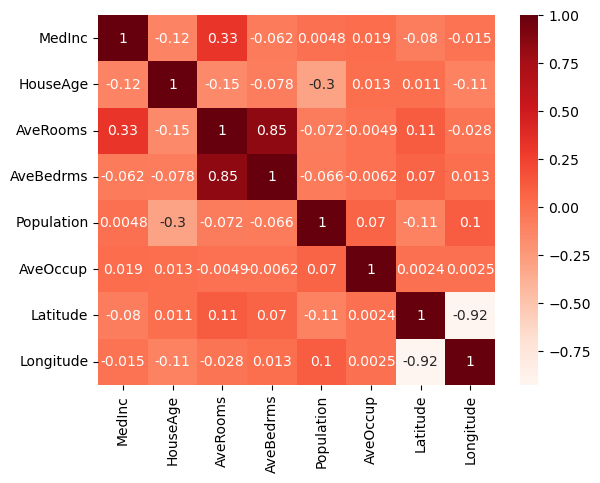

In [15]:
sns.heatmap(data.corr(),annot=True,cmap='Reds')
plt.show()

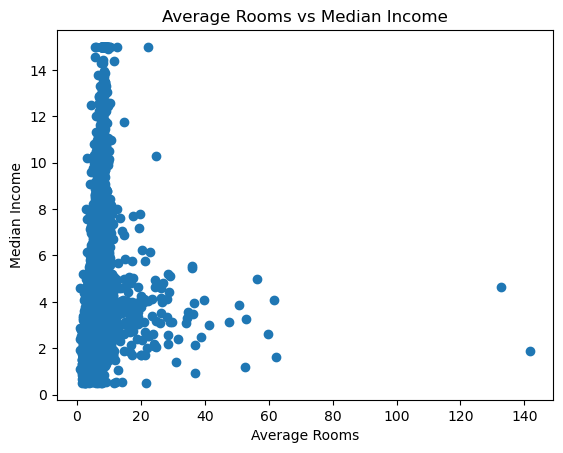

In [16]:
plt.title('Average Rooms vs Median Income')
plt.scatter(data['AveRooms'],data['MedInc'])
plt.xlabel('Average Rooms')
plt.ylabel('Median Income')
plt.show()

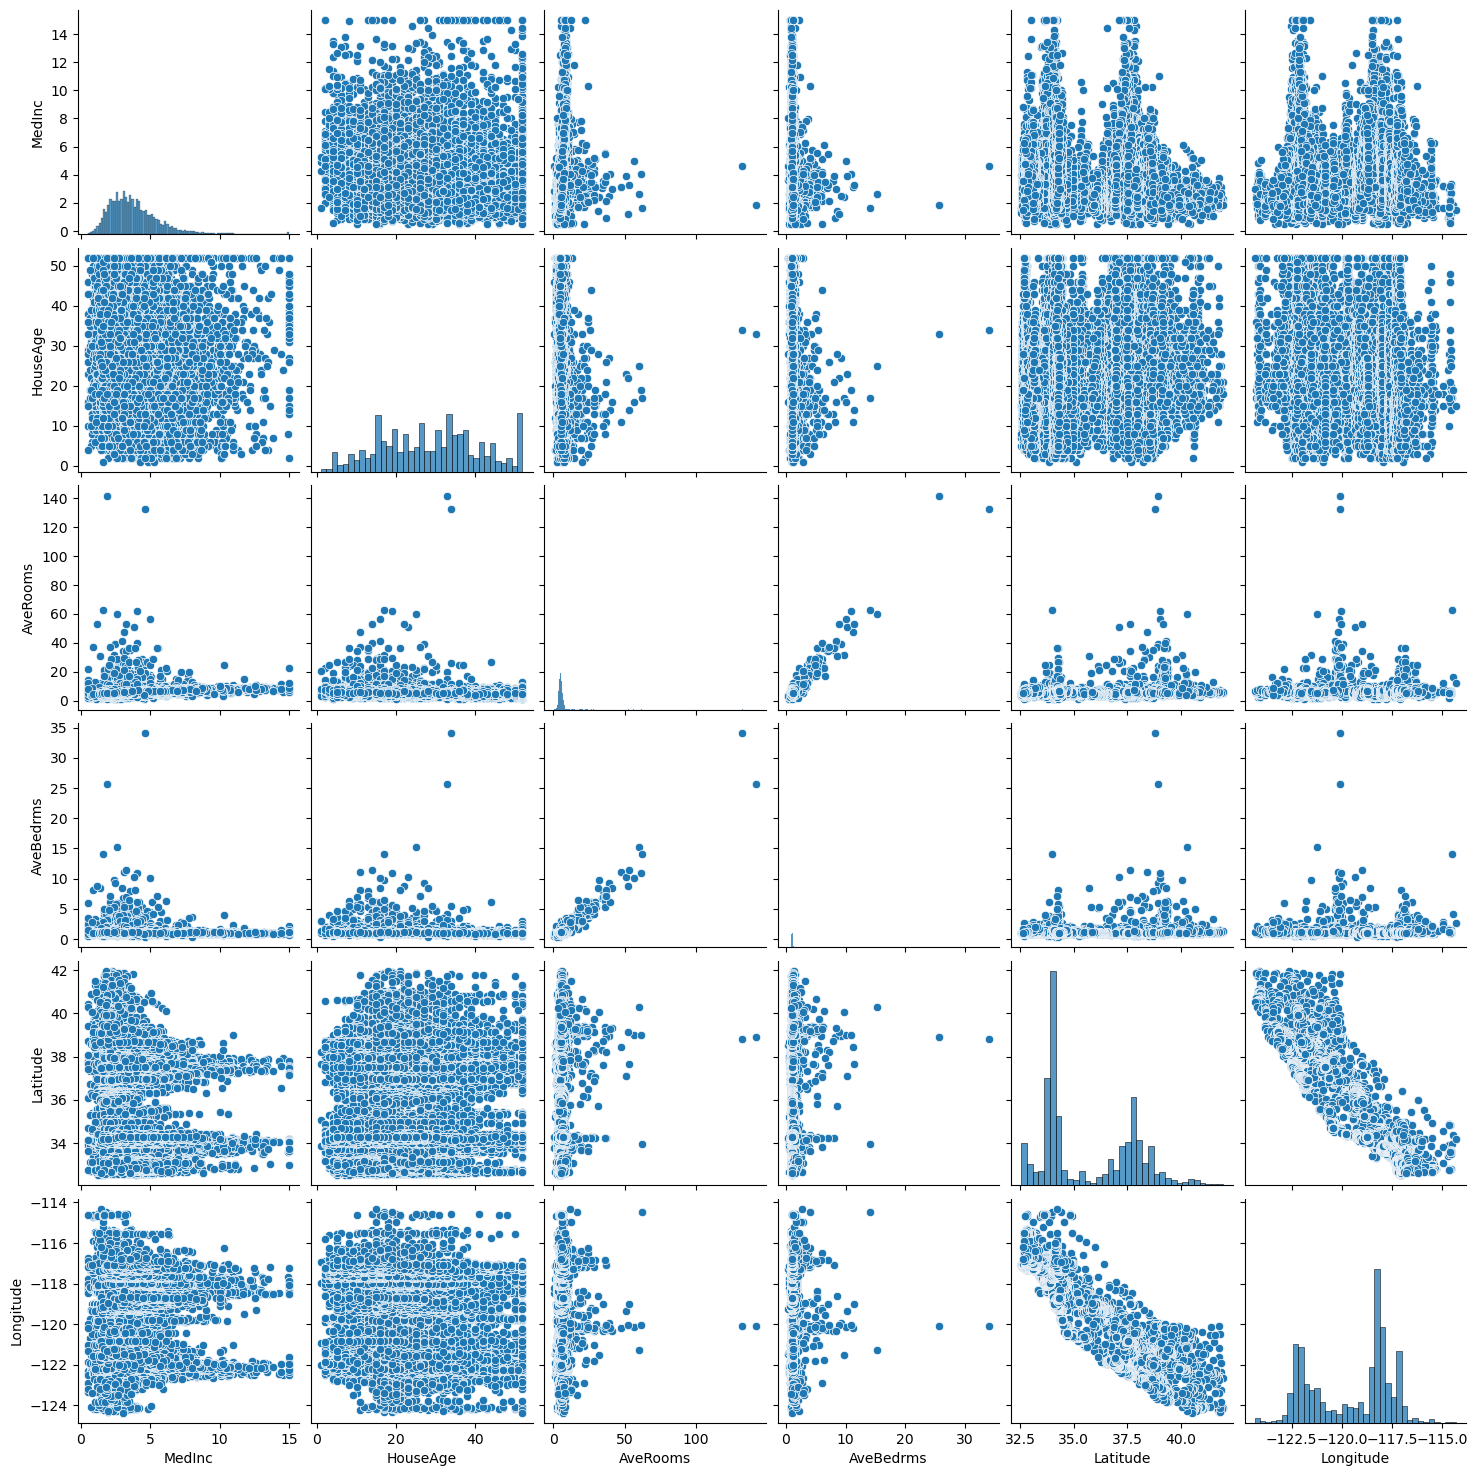

In [17]:
sns.pairplot(data[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Latitude', 'Longitude']])
plt.show()

Text(0.5, 1.0, 'Income Distribution by Location')

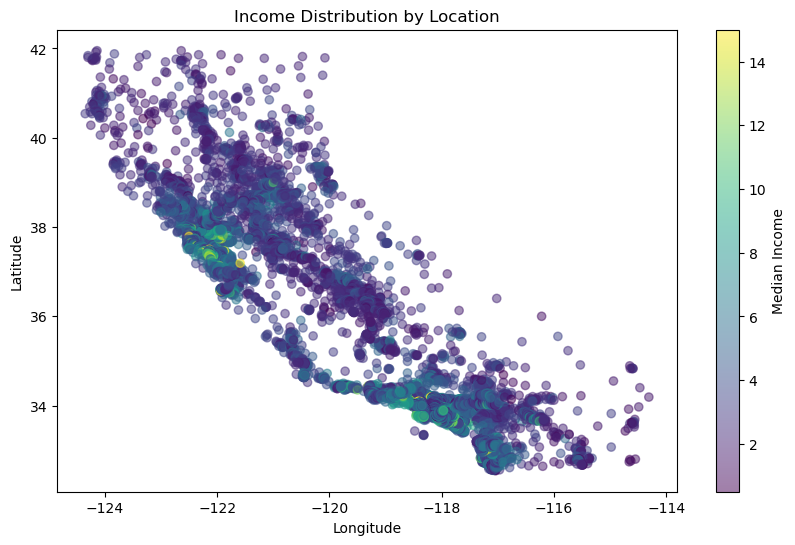

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Longitude'], data['Latitude'], c=data['MedInc'], cmap='viridis', alpha=0.5)
plt.colorbar(label='Median Income')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Income Distribution by Location')


<Axes: xlabel='AveRooms'>

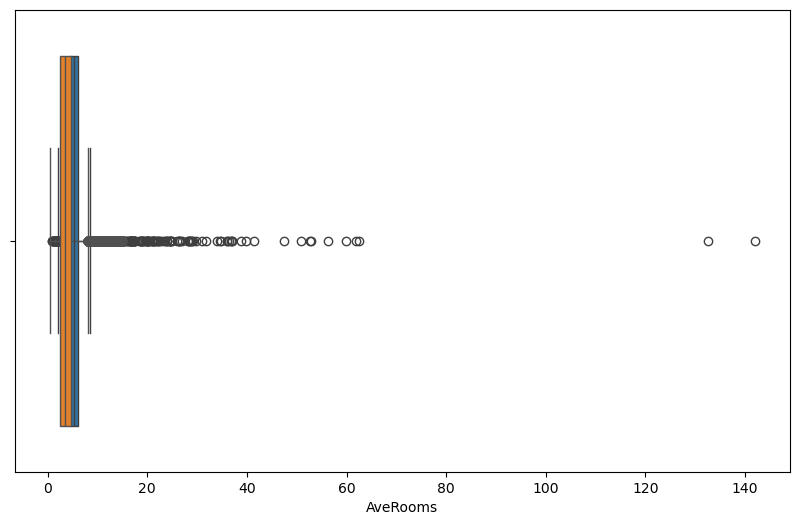

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['AveRooms'])
sns.boxplot(x=data['MedInc'])

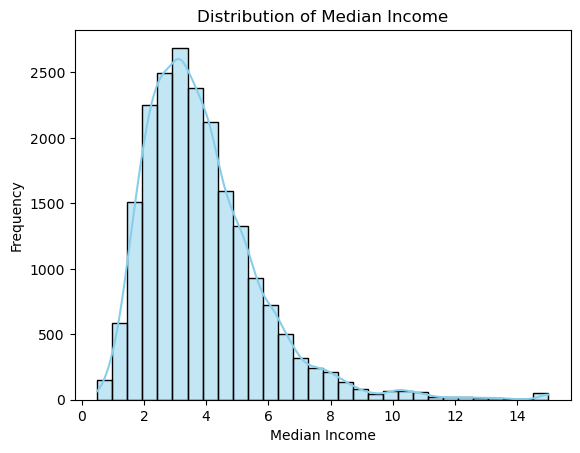

In [20]:
sns.histplot(data['MedInc'], kde=True, bins=30, color='skyblue')
plt.title("Distribution of Median Income")
plt.xlabel("Median Income")
plt.ylabel("Frequency")
plt.show()

In [21]:
data.drop(columns=['AveBedrms', 'Population', 'AveOccup'], inplace=True)

In [22]:
data.head()

,MedInc,HouseAge,AveRooms,Latitude,Longitude
0,8.3252,41.0,6.984127,37.88,-122.23
1,8.3014,21.0,6.238137,37.86,-122.22
2,7.2574,52.0,8.288136,37.85,-122.24
3,5.6431,52.0,5.817352,37.85,-122.25
4,3.8462,52.0,6.281853,37.85,-122.25


In [23]:
for col in ['MedInc', 'AveRooms', 'HouseAge']:
    data[col] = np.log1p(data[col])

In [24]:
data.head()

,MedInc,HouseAge,AveRooms,Latitude,Longitude
0,2.232720,3.737670,2.077455,37.88,-122.23
1,2.230165,3.091042,1.979364,37.86,-122.22
2,2.111110,3.970292,2.228738,37.85,-122.24
3,1.893579,3.970292,1.919471,37.85,-122.25
4,1.578195,3.970292,1.985385,37.85,-122.25


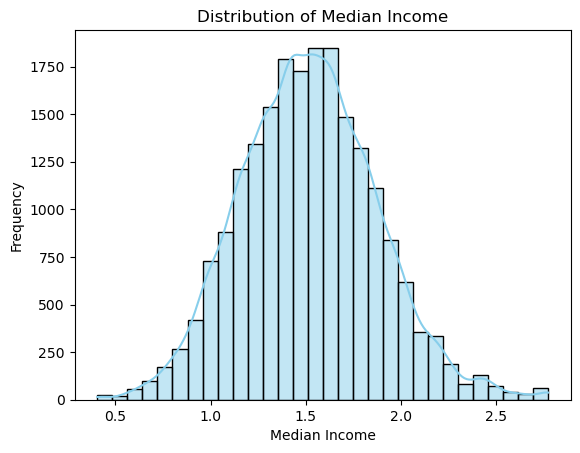

In [25]:
sns.histplot(data['MedInc'], kde=True, bins=30, color='skyblue')
plt.title("Distribution of Median Income")
plt.xlabel("Median Income")
plt.ylabel("Frequency")
plt.show()

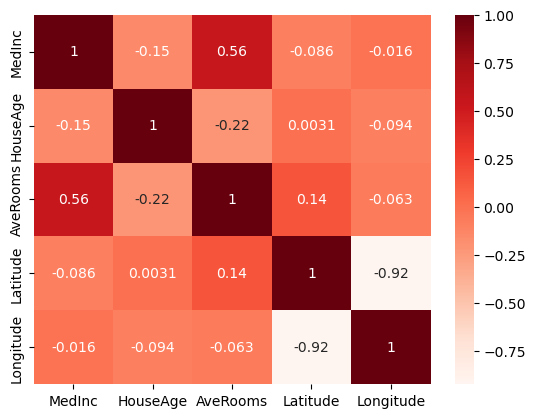

In [26]:
sns.heatmap(data.corr(),annot=True,cmap='Reds')
plt.show()

In [27]:
X=data.drop(['MedInc'],axis=1)

In [28]:
X

,HouseAge,AveRooms,Latitude,Longitude
0,3.737670,2.077455,37.88,-122.23
1,3.091042,1.979364,37.86,-122.22
2,3.970292,2.228738,37.85,-122.24
3,3.970292,1.919471,37.85,-122.25
4,3.970292,1.985385,37.85,-122.25
...,...,...,...,...
20635,3.258097,1.799307,39.48,-121.09
20636,2.944439,1.962070,39.49,-121.21
20637,2.890372,1.825443,39.43,-121.22
20638,2.944439,1.845223,39.43,-121.32


In [29]:
Y=data['MedInc']

In [30]:
Y

0        2.232720
1        2.230165
2        2.111110
3        1.893579
4        1.578195
           ...   
20635    0.940124
20636    1.268861
20637    0.993252
20638    1.053336
20639    1.220417
Name: MedInc, Length: 20640, dtype: float64

In [31]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [32]:
X_train

,HouseAge,AveRooms,Latitude,Longitude
8158,3.637586,1.838680,33.81,-118.12
18368,3.761200,1.996647,37.16,-121.98
19197,3.610918,1.961511,38.45,-122.69
3746,3.496508,1.945910,34.16,-118.41
13073,2.890372,1.757144,38.57,-121.33
...,...,...,...,...
11284,3.583519,1.964175,33.78,-117.96
11964,3.526361,2.062880,34.02,-117.43
5390,3.610918,1.606778,34.03,-118.38
860,2.772589,2.000851,37.58,-121.96


In [33]:
X_test

,HouseAge,AveRooms,Latitude,Longitude
20046,3.258097,1.647158,36.06,-119.01
3024,3.433987,1.798302,35.14,-119.46
15663,3.970292,1.604858,37.80,-122.44
20484,2.890372,1.969018,34.28,-118.72
9814,3.555348,1.870723,36.62,-121.93
...,...,...,...,...
5363,3.951244,1.876746,34.04,-118.42
19755,3.433987,1.706400,40.18,-122.21
4885,3.637586,1.452118,34.02,-118.26
13043,1.945910,2.126132,38.51,-121.06


In [34]:
Y_train

8158     1.651405
18368    1.847951
19197    1.593126
3746     1.997458
13073    1.214438
           ...   
11284    1.997418
11964    1.398717
5390     1.369758
860      1.904969
15795    1.274105
Name: MedInc, Length: 15480, dtype: float64

In [35]:
Y_test

20046    0.986264
3024     1.261666
15663    1.499645
20484    1.907704
9814     1.552868
           ...   
5363     2.031563
19755    1.159958
4885     1.152690
13043    2.065203
8583     2.032363
Name: MedInc, Length: 5160, dtype: float64

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [37]:
X_train

array([[ 0.69034776,  0.03819072, -0.8607415 ,  0.73099911],
       [ 0.92245323,  0.71854785,  0.70916822, -1.19670983],
       [ 0.64027375,  0.56721875,  1.31370062, -1.55128842],
       ...,
       [ 0.64027375, -0.96060748, -0.75764295,  0.60115343],
       [-0.93382675,  0.73665579,  0.90599273, -1.1867217 ],
       [ 1.31505736, -1.49720407,  0.99503238, -1.41644868]])

In [38]:
X_test

array([[-0.02220622, -0.78669292,  0.19367548,  0.28652736],
       [ 0.30805734, -0.13571847, -0.23746391,  0.06179445],
       [ 1.31505736, -0.96887447,  1.00909127, -1.4264368 ],
       ...,
       [ 0.69034776, -1.62672453, -0.76232924,  0.66108221],
       [-2.48605131,  1.27623824,  1.34181841, -0.73725589],
       [ 0.64027375,  0.33358197, -0.82325111,  0.5911653 ]])

In [39]:
import pickle
pickle.dump(scaler,open('scaling.pkl','wb'))

In [40]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)
rf_rmse = mean_squared_error(Y_test, Y_pred, squared=False)
print(f"RMSE: {rf_rmse:}")
print(f"R2 score: {r2_score(Y_test,Y_pred)}")

RMSE: 0.1854896270870697
R2 score: 0.7305748698855457


C:\Users\vishn.000\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [41]:
from xgboost import XGBRegressor
xg_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
xg_model.fit(X_train, Y_train)

y_pred_xg = model.predict(X_test)
xg_rmse = mean_squared_error(Y_test, y_pred_xg, squared=False)
xg_r2 = r2_score(Y_test, y_pred_xg)

print(f"XGBoost RMSE: {xg_rmse}")
print(f"XGBoost R²: {xg_r2}")

XGBoost RMSE: 0.1854896270870697
XGBoost R²: 0.7305748698855457


C:\Users\vishn.000\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


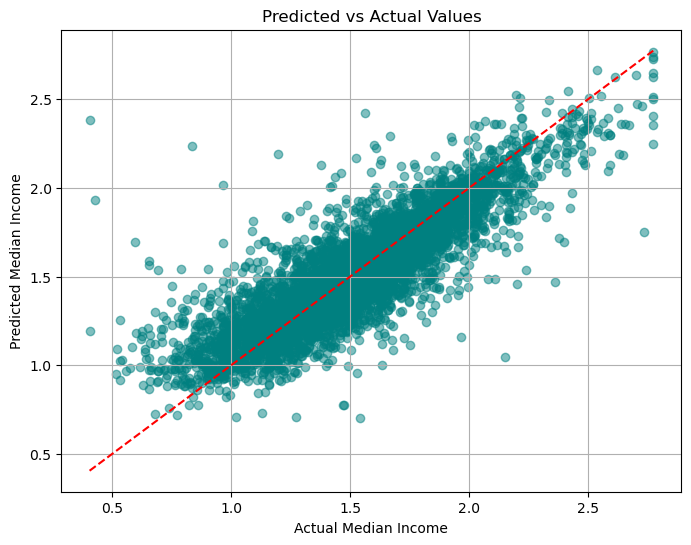

In [42]:
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, Y_pred, alpha=0.5, color='teal')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--')  # reference line
plt.xlabel("Actual Median Income")
plt.ylabel("Predicted Median Income")
plt.title("Predicted vs Actual Values")
plt.grid(True)
plt.show()

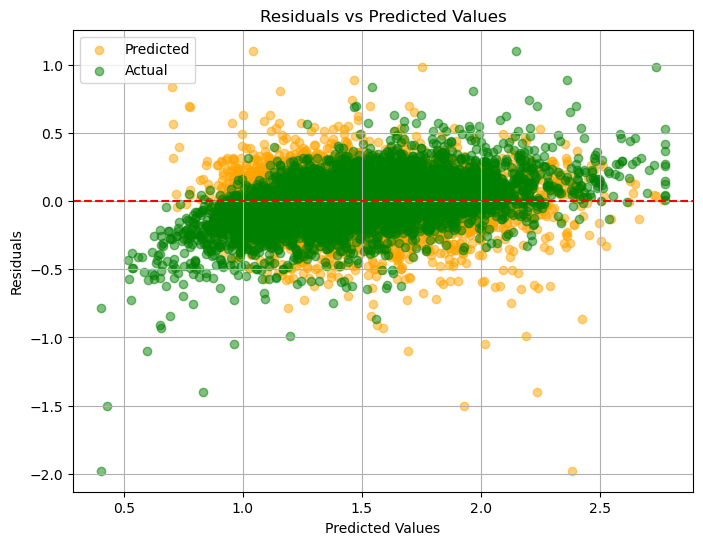

In [43]:
residuals = Y_test - Y_pred

plt.figure(figsize=(8, 6))
plt.scatter(Y_pred,residuals, alpha=0.5, color='orange',label='Predicted')
plt.scatter(Y_test, residuals, alpha=0.5, color='green',label='Actual')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.grid(True)
plt.legend()
plt.show()

C:\Users\vishn.000\AppData\Local\Temp\ipykernel_20656\1573352026.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(Y_test, label='Actual', shade=True)
C:\Users\vishn.000\AppData\Local\Temp\ipykernel_20656\1573352026.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(Y_pred, label='Predicted', shade=True)


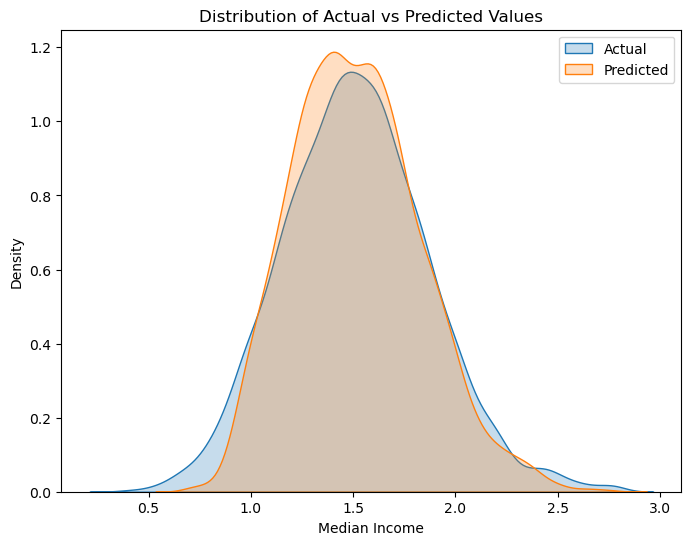

In [44]:
plt.figure(figsize=(8, 6))
sns.kdeplot(Y_test, label='Actual', shade=True)
sns.kdeplot(Y_pred, label='Predicted', shade=True)
plt.title("Distribution of Actual vs Predicted Values")
plt.xlabel("Median Income")
plt.legend()
plt.show()

In [45]:
xgb_params = {
    'n_estimators': [100, 150,250],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 1.0]
}

# Grid search
xgb_grid = GridSearchCV(estimator=xg_model, param_grid=xgb_params, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
xgb_grid.fit(X_train, Y_train)

# Best model and score
print("Best XGB Params:", xgb_grid.best_params_)
print("Best XGB RMSE:", -xgb_grid.best_score_)

Best XGB Params: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 250, 'subsample': 0.8}
Best XGB RMSE: 0.18230041622213206


In [46]:
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Grid search
rf_grid = GridSearchCV(estimator=model, param_grid=rf_params, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
rf_grid.fit(X_train, Y_train)

# Best model and score
print("Best RF Params:", rf_grid.best_params_)
print("Best RF RMSE:", -rf_grid.best_score_)

Best RF Params: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Best RF RMSE: 0.1891587625626465


In [48]:
import pickle
best_model=xgb_grid.best_estimator_
pickle.dump(best_model,open('Medinc_model.pkl','wb'))


In [67]:
pickled_model=pickle.load(open("./Medinc_model.pkl",'rb'))
pickled_model.predict([[3.73767,2.077455,37.88,-122.23]])

array([1.0775312], dtype=float32)